# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of Ridge and Lasso regression!

## Objectives

In this lab you will: 

- Use Lasso and Ridge regression with scikit-learn 
- Compare and contrast Lasso, Ridge and non-regularized regression 

## Housing Prices Data

Let's look at yet another house pricing dataset: 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')

In [2]:
import sklearn
sklearn.__version__

'0.23.2'

Look at `.info()` of the data: 

In [3]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- First, split the data into `X` (predictor) and `y` (target) variables 
- Split the data into 75-25 training-test sets. Set the `random_state` to 10 
- Remove all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cont` and `X_test_cont`, respectively 

In [4]:
# Create X and y
y = df['SalePrice']
X = df.drop(['SalePrice'], axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=10)

# Remove "object"-type features from X
cont_features = df.select_dtypes(exclude=['object'])

# Remove "object"-type features from X_train and X_test
X_train_cont = X_train.select_dtypes(exclude=['object'])
X_test_cont = X_test.select_dtypes(exclude=['object'])

## Let's use this data to build a first naive linear regression model

- Fill the missing values in data using median of the columns (use [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)) 
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [5]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute missing values with median using SimpleImputer
impute = SimpleImputer(strategy='median')
X_test_imputed = impute.fit_transform(X_test_cont)
X_train_imputed = impute.transform(X_train_cont)


# Fit the model 
linreg = LinearRegression()
linreg.fit(X_train_imputed, y_train)

#print R2 and MSE for training and test sets
print('R-squared for Training Set',linreg.score(X_train_imputed, y_train))
print('R-squared for Test Set',linreg.score(X_test_imputed, y_test))

print('Mean Square Error for Training Set',mean_squared_error(y_train, linreg.predict(X_train_imputed)))
print('Mean Square Error for Test Set',mean_squared_error(y_test, linreg.predict(X_test_imputed)))



R-squared for Training Set 0.806899541658789
R-squared for Test Set 0.82030438313704
Mean Square Error for Training Set 1212867755.4594762
Mean Square Error for Test Set 1146491298.9271367


## Normalize your data

- Normalize your data using a `StandardScalar`  
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [6]:
from sklearn.preprocessing import StandardScaler

# Scale the train and test data
ss = StandardScaler()
X_train_imputed_scaled = ss.fit_transform(X_train_imputed)
X_test_imputed_scaled = ss.transform(X_test_imputed)

# Fit the model 
linreg_norm = LinearRegression()
linreg_norm.fit(X_train_imputed_scaled, y_train)

# Print R2 and MSE for training and test sets
print('Training r^2:', linreg_norm.score(X_train_imputed_scaled, y_train))
print('Test r^2:', linreg_norm.score(X_test_imputed_scaled, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg_norm.predict(X_train_imputed_scaled)))
print('Test MSE:', mean_squared_error(y_test, linreg_norm.predict(X_test_imputed_scaled)))

Training r^2: 0.8068905913175655
Test r^2: 0.8201283515721725
Training MSE: 1212923972.72775
Test MSE: 1147614412.896083


## Include categorical variables

The above models didn't include categorical variables so far, let's include them! 


- Include all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cat` and `X_test_cat`, respectively 
- Fill missing values in all these columns with the string `'missing'` 

In [10]:
# Create X_cat which contains only the categorical variables
features_cat = X.select_dtypes(include=['object'])
X_train_cat = X_train.select_dtypes(include=['object'])
X_test_cat = X_test.select_dtypes(include=['object'])

# Fill missing values with the string 'missing'
X_train_cat.fillna('missing',inplace=True)
X_test_cat.fillna('missing', inplace=True)

In [20]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 567 to 1289
Data columns (total 43 columns):
MSZoning         1095 non-null object
Street           1095 non-null object
Alley            1095 non-null object
LotShape         1095 non-null object
LandContour      1095 non-null object
Utilities        1095 non-null object
LotConfig        1095 non-null object
LandSlope        1095 non-null object
Neighborhood     1095 non-null object
Condition1       1095 non-null object
Condition2       1095 non-null object
BldgType         1095 non-null object
HouseStyle       1095 non-null object
RoofStyle        1095 non-null object
RoofMatl         1095 non-null object
Exterior1st      1095 non-null object
Exterior2nd      1095 non-null object
MasVnrType       1095 non-null object
ExterQual        1095 non-null object
ExterCond        1095 non-null object
Foundation       1095 non-null object
BsmtQual         1095 non-null object
BsmtCond         1095 non-null object
BsmtExposure     

- One-hot encode all these categorical columns using `OneHotEncoder` 
- Transform the training and test DataFrames (`X_train_cat`) and (`X_test_cat`) 
- Run the given code to convert these transformed features into DataFrames 

In [12]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncode categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform training and test sets
X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

# Convert these columns into a DataFrame
columns = ohe.get_feature_names(input_features=X_train_cat.columns)
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

- Combine `X_train_imputed_scaled` and `cat_train_df` into a single DataFrame  
- Similarly, combine `X_test_imputed_scaled` and `cat_test_df` into a single DataFrame 

In [14]:
X_train_imputed_scaled

array([[-3.75465249e-01, -8.68555119e-01,  1.94083749e-03, ...,
        -9.15081857e-02, -1.22120389e+00,  1.63631229e+00],
       [ 1.64680031e+00,  3.09762998e+00, -4.31776929e-01, ...,
        -9.15081857e-02, -8.54138759e-01,  1.63631229e+00],
       [ 1.54199502e+00,  6.46649034e-02,  2.18799721e-01, ...,
        -9.15081857e-02, -1.20008507e-01, -1.37631816e+00],
       ...,
       [-4.70742778e-01,  6.46649034e-02, -1.28174492e-01, ...,
        -9.15081857e-02,  1.71531712e+00,  1.29997068e-01],
       [ 1.01082280e+00,  2.97969909e-01, -8.65494696e-01, ...,
        -9.15081857e-02,  2.47056619e-01,  8.83154681e-01],
       [ 1.34429415e+00,  6.46649034e-02,  6.95889264e-01, ...,
        -9.15081857e-02,  1.34825200e+00, -1.37631816e+00]])

In [21]:
# Your code here
X_train_all = pd.concat([pd.DataFrame(X_train_imputed_scaled),cat_train_df], axis=1)
X_test_all = pd.concat([pd.DataFrame(X_test_imputed_scaled),cat_test_df], axis=1)

Now build a linear regression model using all the features (`X_train_all`). Also, print the R-squared and the MSE for both the training and test sets. 

In [22]:
# Your code here
lin_model = LinearRegression()
lin_model.fit(X_train_all,y_train)

print('R-squared for Training Set',lin_model.score(X_train_all, y_train))
print('R-squared for Test Set',lin_model.score(X_test_all, y_test))

print('Mean Square Error for Training Set',mean_squared_error(y_train, lin_model.predict(X_train_all)))
print('Mean Square Error for Test Set',mean_squared_error(y_test, lin_model.predict(X_test_all)))


R-squared for Training Set 0.9360072557213687
R-squared for Test Set -4.329440062628798e+18
Mean Square Error for Training Set 401939678.37077624
Mean Square Error for Test Set 2.7622629019470637e+28


Notice the severe overfitting above; our training R-squared is very high, but the test R-squared is negative! Similarly, the scale of the test MSE is orders of magnitude higher than that of the training MSE.

## Ridge and Lasso regression

Use all the data (normalized features and dummy categorical variables, `X_train_all`) to build two models - one each for Lasso and Ridge regression. Each time, look at R-squared and MSE. 

## Lasso

#### With default parameter (alpha = 1)

In [27]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()
lasso.fit(X_train_all,y_train)

print('The R-squared of training set using lasso regression is',lasso.score(X_train_all,y_train))
print('The mean squared error of training set using lasso regression is', mean_squared_error(y_train, lasso.predict(X_train_all)))

print('The R-squared of test set using lasso regression is',lasso.score(X_test_all,y_test))
print('The mean squared error of test set using lasso regression is', mean_squared_error(y_test, lasso.predict(X_test_all)))

The R-squared of training set using lasso regression is 0.9359754057283418
The mean squared error of training set using lasso regression is 402139728.79989296
The R-squared of test set using lasso regression is 0.8886800151808864
The mean squared error of test set using lasso regression is 710242109.5175984


#### With a higher regularization parameter (alpha = 10)

In [28]:
# Your code here
lasso_hi = Lasso(alpha=10)
lasso_hi.fit(X_train_all,y_train)

print('The R-squared of training set using lasso regression is',lasso_hi.score(X_train_all,y_train))
print('The mean squared error of training set using lasso regression is', mean_squared_error(y_train, lasso_hi.predict(X_train_all)))

print('The R-squared of test set using lasso regression is',lasso_hi.score(X_test_all,y_test))
print('The mean squared error of test set using lasso regression is', mean_squared_error(y_test, lasso_hi.predict(X_test_all)))

The R-squared of training set using lasso regression is 0.9343886046777765
The mean squared error of training set using lasso regression is 412106457.2328169
The R-squared of test set using lasso regression is 0.8966371416238338
The mean squared error of test set using lasso regression is 659474169.8729742


## Ridge

#### With default parameter (alpha = 1)

In [26]:
# Your code here
ridge = Ridge(alpha=1)
ridge.fit(X_train_all,y_train)

print('The R-squared of training set using ridge regression is',ridge.score(X_train_all,y_train))
print('The mean squared error of training set using ridge regression is', mean_squared_error(y_train, ridge.predict(X_train_all)))

print('The R-squared of test set using ridge regression is',ridge.score(X_test_all,y_test))
print('The mean squared error of test set using ridge regression is', mean_squared_error(y_test, ridge.predict(X_test_all)))

The R-squared of training set using ridge regression is 0.9231925433072837
The mean squared error of training set using ridge regression is 482429137.6711058
The R-squared of test set using ridge regression is 0.8842601359835747
The mean squared error of test set using ridge regression is 738441756.9574761


#### With default parameter (alpha = 10)

In [29]:
# Your code here
ridge_hi = Ridge(alpha=10)
ridge_hi.fit(X_train_all,y_train)

print('The R-squared of training set using ridge regression is',ridge_hi.score(X_train_all,y_train))
print('The mean squared error of training set using ridge regression is', mean_squared_error(y_train, ridge_hi.predict(X_train_all)))

print('The R-squared of test set using ridge regression is',ridge_hi.score(X_test_all,y_test))
print('The mean squared error of test set using ridge regression is', mean_squared_error(y_test, ridge_hi.predict(X_test_all)))

The R-squared of training set using ridge regression is 0.8990029156536692
The mean squared error of training set using ridge regression is 634364662.0591314
The R-squared of test set using ridge regression is 0.8834797189263354
The mean squared error of test set using ridge regression is 743420962.2451688


## Compare the metrics    

Write your conclusions here: 
_________________________________


## Compare number of parameter estimates that are (very close to) 0 for Ridge and Lasso

Use 10**(-10) as an estimate that is very close to 0. 

In [34]:
# Number of Ridge params almost zero
sum(abs(ridge.coef_) <10**-10)

0

In [37]:
# Number of Lasso params almost zero
sum(abs(lasso_hi.coef_) <10**-10)

77

In [39]:
print(len(lasso_hi.coef_))
print(sum(abs(lasso_hi.coef_) < 10**(-10))/ len(lasso_hi.coef_))

296
0.26013513513513514


Lasso was very effective to essentially perform variable selection and remove about 25% of the variables from your model!

## Put it all together

To bring all of our work together lets take a moment to put all of our preprocessing steps for categorical and continuous variables into one function. This function should take in our features as a dataframe `X` and target as a Series `y` and return a training and test DataFrames with all of our preprocessed features along with training and test targets. 

In [40]:
def preprocess(X, y):
    '''Takes in features and target and implements all preprocessing steps for categorical and continuous features returning 
    train and test DataFrames with targets'''
    y = df['SalePrice']
    X = df.drop(['SalePrice'], axis=1)
    
    # Train-test split (75-25), set seed to 10
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=10)
    
    # Remove "object"-type features and SalesPrice from X
    X_train_cont = X_train.select_dtypes(exclude=['object'])
    X_test_cont = X_test.select_dtypes(exclude=['object'])

    # Impute missing values with median using SimpleImputer
    impute = SimpleImputer(strategy='median')
    X_test_imputed = impute.fit_transform(X_test_cont)
    X_train_imputed = impute.transform(X_train_cont)

    # Scale the train and test data
    ss = StandardScaler()
    X_train_imputed_scaled = ss.fit_transform(X_train_imputed)
    X_test_imputed_scaled = ss.transform(X_test_imputed)

    # Create X_cat which contains only the categorical variables
    X_train_cat = X_train.select_dtypes(include=['object'])
    X_test_cat = X_test.select_dtypes(include=['object'])

    # Fill nans with a value indicating that that it is missing
    X_train_cat.fillna('missing',inplace=True)
    X_test_cat.fillna('missing', inplace=True)   
 
    # OneHotEncode categorical variables
    ohe = OneHotEncoder(handle_unknown='ignore')

    # Transform training and test sets
    X_train_ohe = ohe.fit_transform(X_train_cat)
    X_test_ohe = ohe.transform(X_test_cat)
    
    # Combine categorical and continuous features into the final dataframe
    cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
    cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)
    
    X_train_all = pd.concat([pd.DataFrame(X_train_imputed_scaled),cat_train_df], axis=1)
    X_test_all = pd.concat([pd.DataFrame(X_test_imputed_scaled),cat_test_df], axis=1)
    
    return X_train_all, X_test_all, y_train, y_test

### Graph the training and test error to find optimal alpha values

Earlier we tested two values of alpha to see how it effected our MSE and the value of our coefficients. We could continue to guess values of alpha for our Ridge or Lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would do this:  

In [41]:
X_train_all, X_test_all, y_train, y_test = preprocess(X, y)

train_mse = []
test_mse = []
alphas = []

for alpha in np.linspace(0, 200, num=50):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_all, y_train)
    
    train_preds = lasso.predict(X_train_all)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_all)
    test_mse.append(mean_squared_error(y_test, test_preds))
    
    alphas.append(alpha)

Optimal Alpha Value: 40


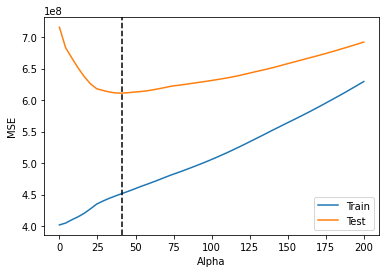

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and test MSE against alpha. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what alpha represents and how it relates to overfitting vs underfitting.

## Summary

Well done! You now know how to build Lasso and Ridge regression models, use them for feature selection and find an optimal value for $\text{alpha}$. 